In [537]:
import numpy as np
import pandas as pd
import  cv2
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import glob
import os
import matplotlib.pyplot as plt
from tensorflow.python.layers.pooling import MaxPooling2D




In [538]:
data=pd.read_csv('Houses/HousesInfo.txt',header=None,sep=' ',names=['bedrooms','bathrooms','area','zipcode','price'])
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [539]:
data.index.values+1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [540]:
sorted(list(glob.glob(os.path.sep.join(['Houses',"{}*".format(1)]))))

['Houses\\100_bathroom.jpg',
 'Houses\\100_bedroom.jpg',
 'Houses\\100_frontal.jpg',
 'Houses\\100_kitchen.jpg',
 'Houses\\101_bathroom.jpg',
 'Houses\\101_bedroom.jpg',
 'Houses\\101_frontal.jpg',
 'Houses\\101_kitchen.jpg',
 'Houses\\102_bathroom.jpg',
 'Houses\\102_bedroom.jpg',
 'Houses\\102_frontal.jpg',
 'Houses\\102_kitchen.jpg',
 'Houses\\103_bathroom.jpg',
 'Houses\\103_bedroom.jpg',
 'Houses\\103_frontal.jpg',
 'Houses\\103_kitchen.jpg',
 'Houses\\104_bathroom.jpg',
 'Houses\\104_bedroom.jpg',
 'Houses\\104_frontal.jpg',
 'Houses\\104_kitchen.jpg',
 'Houses\\105_bathroom.jpg',
 'Houses\\105_bedroom.jpg',
 'Houses\\105_frontal.jpg',
 'Houses\\105_kitchen.jpg',
 'Houses\\106_bathroom.jpg',
 'Houses\\106_bedroom.jpg',
 'Houses\\106_frontal.jpg',
 'Houses\\106_kitchen.jpg',
 'Houses\\107_bathroom.jpg',
 'Houses\\107_bedroom.jpg',
 'Houses\\107_frontal.jpg',
 'Houses\\107_kitchen.jpg',
 'Houses\\108_bathroom.jpg',
 'Houses\\108_bedroom.jpg',
 'Houses\\108_frontal.jpg',
 'Houses\\1

In [541]:
# basepath=os.path.sep.join(["Houses","{}_*".format(1)])
# imgpahts=sorted(list(glob.glob(basepath)))
# input_img=[]
# for imgpaht in imgpahts:
#     image=cv2.resize(cv2.imread(imgpaht),(32,32))
#     input_img.append(image)
# np.shape(input_img)

In [542]:
images = []

for i in data.index.values:
    basepath = os.path.sep.join(['Houses', "{}_*".format(i + 1)])
    imgPaths = sorted(list(glob.glob(basepath)))
    inputImages = []

    for imgPath in imgPaths:
        image = cv2.resize(cv2.imread(imgPath), (32, 32))
        inputImages.append(image)

    if len(inputImages) >= 4:
        outputImage = np.zeros((64, 64, 3), dtype='uint8')
        outputImage[0:32, 0:32] = inputImages[0]
        outputImage[0:32, 32:64] = inputImages[1]
        outputImage[32:64, 32:64] = inputImages[2]
        outputImage[32:64, 0:32] = inputImages[3]
        images.append(outputImage)

In [543]:
images=np.array(images)
images.shape

(535, 64, 64, 3)

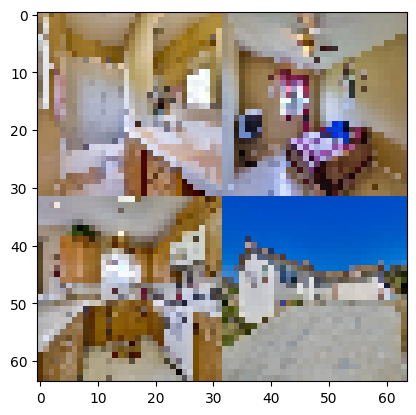

In [544]:
plt.imshow(images[100][...,::-1])

In [545]:
x_train,x_test,IX_train,IX_test=train_test_split(data,images,random_state=523)


In [546]:
max_price=x_train['price'].max()
y_train=x_train['price']/max_price
y_test=x_test['price']/max_price

In [547]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout,BatchNormalization,Input,concatenate

In [548]:
input__1=Input(shape=(64,64,3))
conv1=Conv2D(filters=16,activation='relu',padding='same',kernel_size=(3,3))(input__1)
betchnormalize=BatchNormalization(axis=1)(conv1)
max_pol=MaxPooling2D(pool_size=(2,2))(betchnormalize)


conv2=Conv2D(filters=32,activation='relu',padding='same',kernel_size=(3,3))(max_pol)
betchnormalize2=BatchNormalization(axis=1)(conv2)
max_pol2=MaxPooling2D(pool_size=(2,2))(betchnormalize2)

conv3=Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3))(max_pol2)
betchnormalize3=BatchNormalization(axis=1)(conv3)
max_pol3=MaxPooling2D(pool_size=(2,2))(betchnormalize3)

flat=Flatten()(max_pol3)
dense1=Dense(32,activation='relu')(flat)
betchnormalize4=BatchNormalization(axis=-1)(dense1)
drop_out=Dropout(0.5)(betchnormalize4)
dense2=Dense(16,activation='relu')(drop_out)

In [549]:
m1=Model(input__1,dense2)

In [550]:
m1.summary()

Model: "functional_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_65 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 64, 64, 16)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 16, 16, 64)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,792 (608.56 KB)

 Trainable params: 155,504 (607.44 KB)

 Non-trainable params: 288 (1.12 KB)

In [551]:
sclaer=StandardScaler()
XT=sclaer.fit_transform(x_train[['bedrooms','bathrooms','area']])
Xt=sclaer.transform(x_test[['bedrooms','bathrooms','area']])


In [552]:
lb=LabelBinarizer()
lb.fit(data['zipcode'])
XTz=lb.transform(x_train['zipcode'])
Xtz=lb.transform(x_test['zipcode'])


In [553]:
Xtz

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(134, 49))

In [554]:
XT=np.hstack([XT,XTz])
Xt=np.hstack([Xt,Xtz])

In [555]:
Xt[0]

array([0.51790082, 1.33452284, 0.84044073, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [556]:
XT.shape

(401, 52)

In [557]:
inp=Input(shape=(52,))
m2=Sequential()
m2.add(Dense(16,activation='relu'))
m2.add(Dropout(0.5))
m2.add(Dense(8,activation='relu'))
m2.add(Dense(4,activation='relu'))
out=m2(inp)

In [558]:
m2.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 16)             │           848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020 (3.98 KB)

 Trainable params: 1,020 (3.98 KB)

 Non-trainable params: 0 (0.00 B)

In [559]:
combindmodel=concatenate([out,m1.output])

In [560]:
dense3=Dense(8,activation='relu')(combindmodel)
dense4=Dense(1,activation='linear')(dense3)

In [561]:
model=Model(inputs=[m1.input,inp],outputs=dense4)

In [562]:
model.summary()

Model: "functional_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_65      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 64, 64,    │        448 │ input_layer_65[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_45[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_45    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 32, 32,    │      4,640 │ max_pooling2d_45… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_46[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_46    │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_46… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │         64 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 4096)      │          0 │ max_pooling2d_47… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_166 (Dense)   │ (None, 32)        │    131,104 │ flatten_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_166[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_66      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 32)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_30       │ (None, 4)         │      1,020 │ input_layer_66[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_167 (Dense)   │ (None, 16)        │        528 │ dropout_44[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 156,989 (613.24 KB)

 Trainable params: 156,701 (612.11 KB)

 Non-trainable params: 288 (1.12 KB)

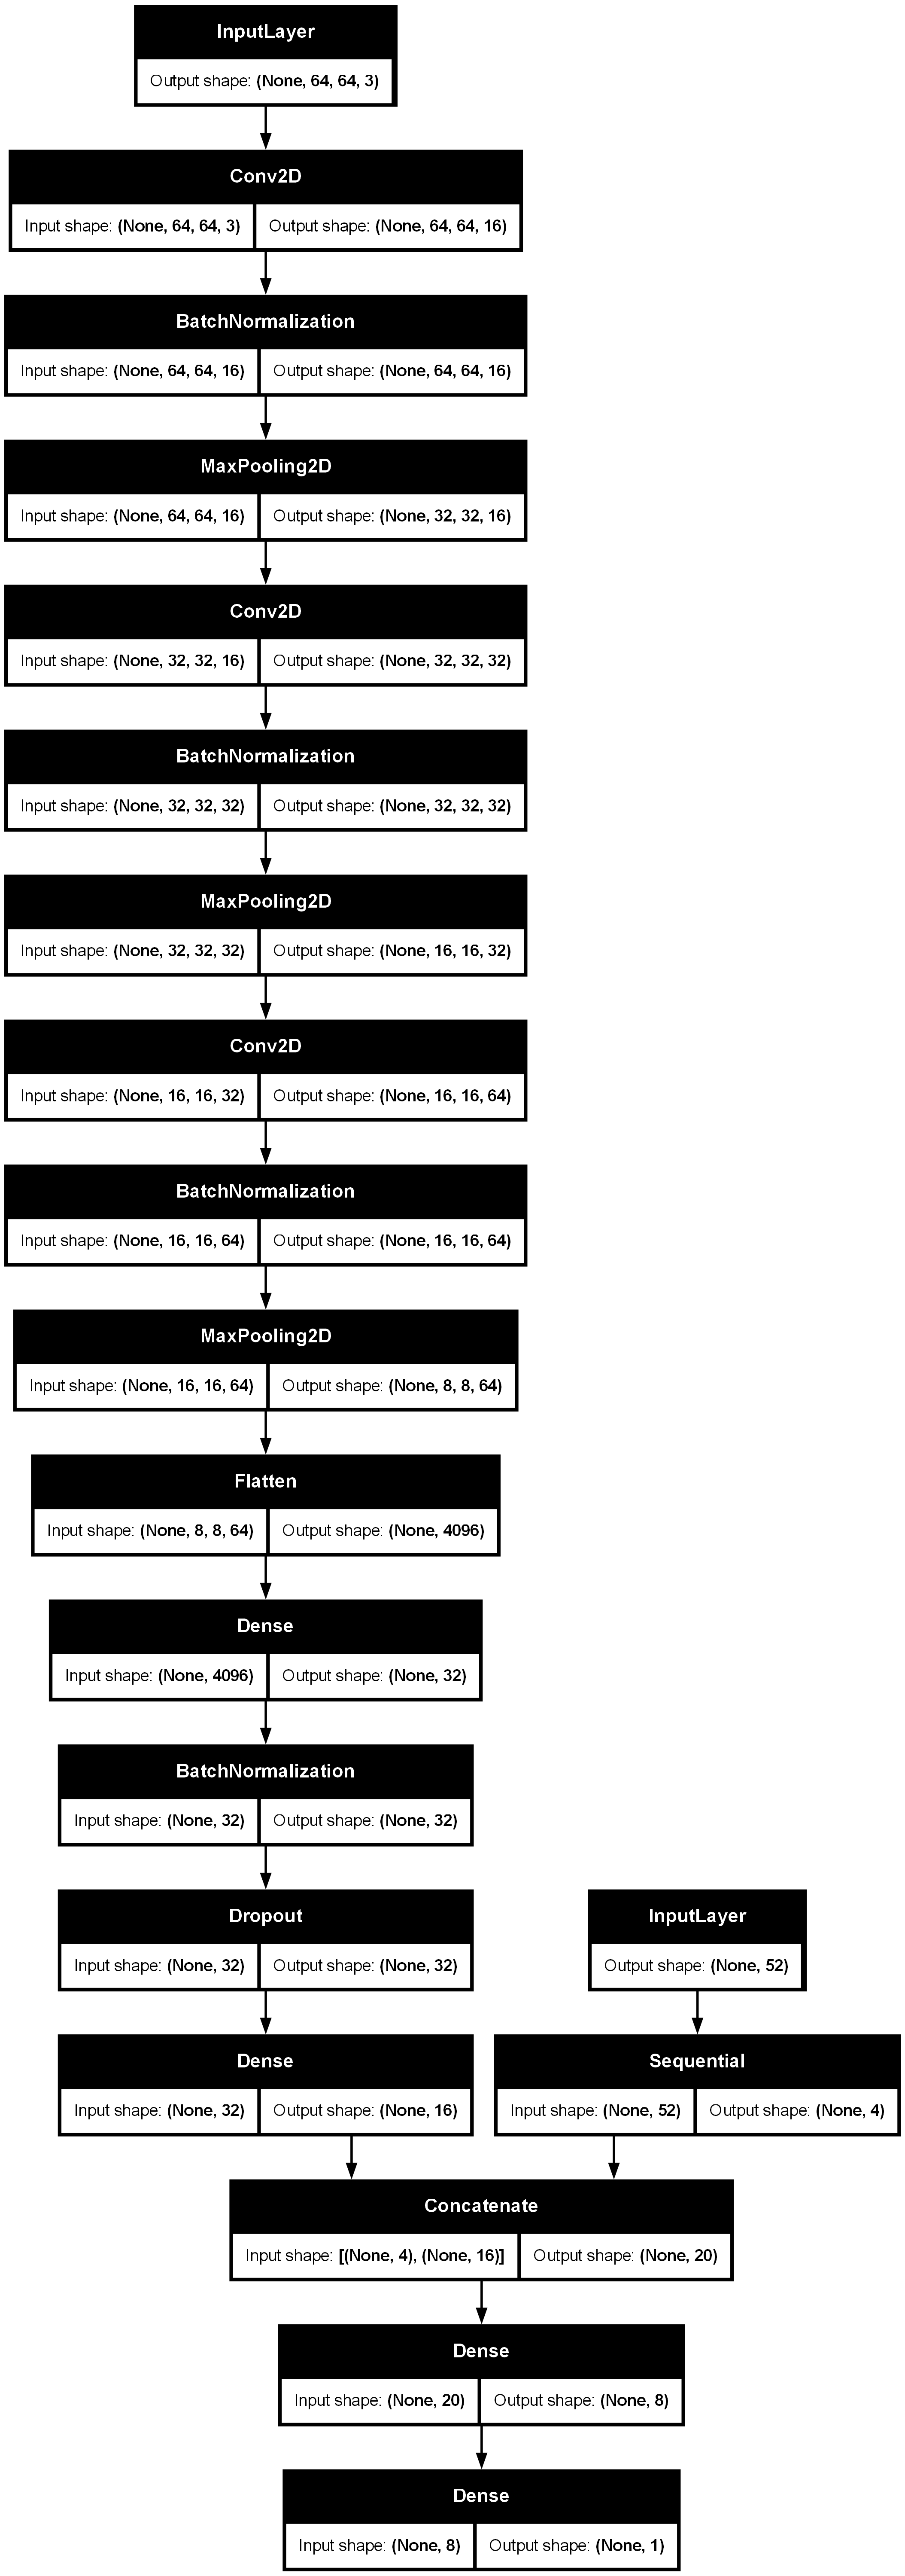

In [563]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [564]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [565]:
model.fit([IX_train, XT], y_train,epochs=100, batch_size=10,validation_data=([IX_test, Xt], y_test))

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2966 - val_loss: 2.0071
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2158 - val_loss: 1.3537
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1659 - val_loss: 0.1849
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1346 - val_loss: 0.1507
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1240 - val_loss: 0.1152
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1128 - val_loss: 0.0959
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1042 - val_loss: 0.1122
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0965 - val_loss: 0.0846
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0946 - val_loss: 0.0928
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0904 - val_loss: 0.0843
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0842 - val_loss: 0.1047
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [569]:
predic=model.predict([IX_test,Xt])*max_price

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [570]:
y_test*max_price

11     1039000.0
81      529800.0
75      184900.0
524     569950.0
436     309900.0
         ...    
430     699900.0
92      979000.0
141     895000.0
244     539800.0
486     275000.0
Name: price, Length: 134, dtype: float64

In [571]:
diff=abs(predic.flatten()-(y_test*max_price))
diff

11     116375.650406
81      26601.316738
75     127851.507866
524     47735.973644
436    135440.454578
           ...      
430    130875.735188
92     349410.978794
141    120344.359875
244     35594.093990
486     50187.921524
Name: price, Length: 134, dtype: float64

In [572]:
data['price'].std()

np.float64(509026.06764905667)

In [573]:
diff.mean()

np.float64(169028.64263721366)

In [574]:
from sklearn.metrics import  r2_score,mean_absolute_error

In [575]:
r2_score(y_pred=predic.flatten(),y_true=(y_test*max_price))

0.35328793055902197

In [576]:
abs(model.predict([IX_test,Xt]).flatten()-y_test).mean()*max_price

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


np.float64(169028.64263721366)